# Indicators of heavy traffic on I-94 Interstate highway

## About the dataset
For this analysis, we will be using a dataset about the westbound traffic on the I-94 Interstate highway in the United States.
John Hogue made the dataset available downloadable from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). The dataset contains the hourly Minneapolis-St Paul, MN traffic volume for westbound I-94, including weather and holiday features from 2012-2018.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

> The goal of our analysis is to determine which are the indicators that will lead to a heavier traffic. These indicators can be weather type, time of the day or week etc. 

Let's explore the dataset.

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


In [2]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
metro.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. It has been collected hourly between 2012-10-02 09:00:00 to 2018-09-30 23:00:00, approximately a span of 4 years.

The attributes in the dataset are as follow:
* `holiday` -  US National holidays plus regional holiday, Minnesota State Fair
* `temp`    - Average temp in kelvin
* `rain_1h` - Amount(mm) of rain that occurred in the hour
* `snow_1h` - Amount(mm) of snow that occurred in the hour
* `clouds_all` - Percentage of cloud cover
* `weather_main` - Short textual description of the current weather
* `weather_description` -  Longer textual description of the current weather
* `date_time` - DateTime Hour of the data collected in local CST time
* `traffic_volume` - Hourly I-94 ATR 301 reported westbound traffic volume

____

# Analysing Traffic Volume

We will plot a histogram to visualize the distribution of the `traffic_volume` column and look up some statistics about this column.

<AxesSubplot:ylabel='Frequency'>

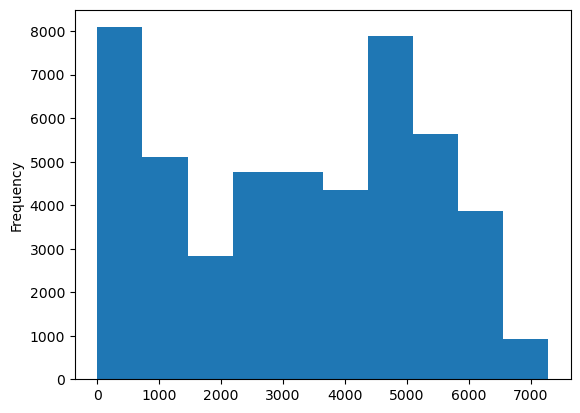

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

metro['traffic_volume'].plot.hist()

In [6]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time (at 75 percentile), the traffic volume was four times as much or more (4,933 cars or more).

This observation gives our analysis an interesting direction: **comparing daytime data with nighttime data**.

# Analysing traffic volume: Day vs. Night

We will convert `date_time` into datetime data and divide the dataset into two parts:
* Daytime data: hours from 7am to 7pm (12 hours)
* Nighttime data: hours from 7pm to 7am (12 hours)


In [7]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

import datetime as dt

#extracting hours into a list
hours = metro['date_time'].dt.hour

#use hours range to filter through metro data to isolate rows for 
#day and night rows
day = metro[(hours >=7) & (hours <19)]
night = metro[(hours >=19) | (hours < 7)]

print("This is the number of rows for daytime:", day.shape[0])
print("This is the number of rows for nighttime:", night.shape[0])

This is the number of rows for daytime: 23877
This is the number of rows for nighttime: 24327


In [8]:
metro.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 under `date_time`, you'll notice there's no data for two hours (4 and 5).

After isolating day and night rows, we will compare the traffic volume between these 2 periods.

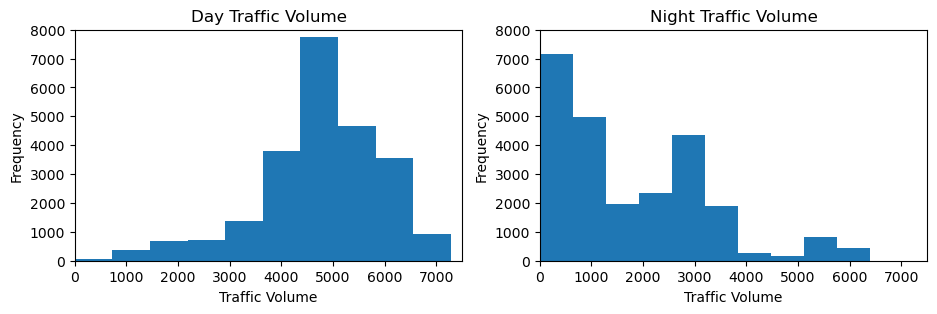

In [9]:
#plot histograms of traffic volume for both day and night in grid chart
plt.figure(figsize=(11, 3))

#subplot for day
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Day Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0, 8000)
plt.xlim(0,7500)

#subplot for night
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0, 8000)
plt.xlim(0,7500)

plt.show()

In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252). 

The histogram displaying the night data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

---

# Analysing time indicators during daytime

Focusing on the daytime data, we are going to investigate further on time as an indicator of heavy traffic as there might be more people on the road in a certain month, on a certain day, or at a certain time of the day. We will look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

## By month

We will start by aggregating the average traffic volume for each month, and generate a line plot for this.

In [12]:
#create a new column that extracts each month the
#traffic volume measurement was taken 

day['month'] = day.copy()['date_time'].dt.month

#group dataset by month column with the mean as an aggregate function

by_month = day.groupby('month').mean()

by_month['traffic_volume']



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

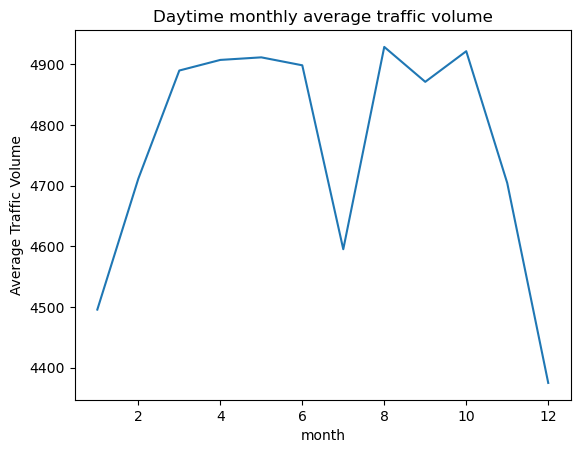

In [13]:
by_month['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.title('Daytime monthly average traffic volume')
plt.show

Average traffic volume are the highest during warm months March-June and August-October, and  are the lowest during cold months Nov - Feb. There is however an exceptional dip in July which we will investigate next, whether this is a yearly event and see if we can find an explanation for this.

## July dip in traffic volume

In [14]:
#filter out only july data
july_data = day[day['month'] ==7]

#create new column for year
july_data['year'] = july_data['date_time'].dt.year

#group the average of July traffic for each year the measurement was taken
by_year = july_data.groupby('year').mean()

by_year['traffic_volume']


year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Yearly Average Traffic Volume in July')

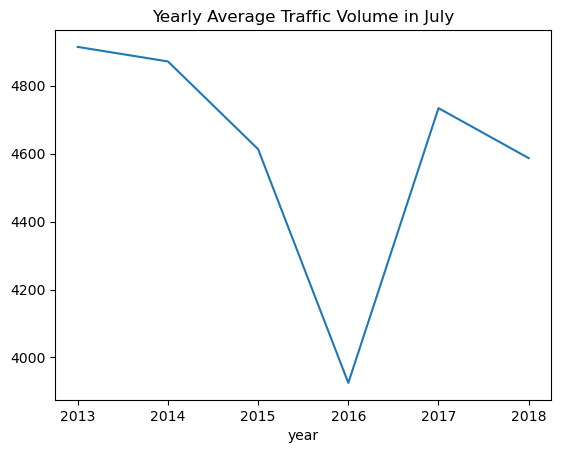

In [15]:
#plot line graph for july in all years
by_year['traffic_volume'].plot.line()
plt.title('Yearly Average Traffic Volume in July')

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. [This article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) suggests that there are road works being done on i-96 highway in July 2016, this would explain why there is a sudden dip in traffic volume for that year.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.
____

## By day of the week

We will now continue with building line plots for another time unit: **day of the week**. 

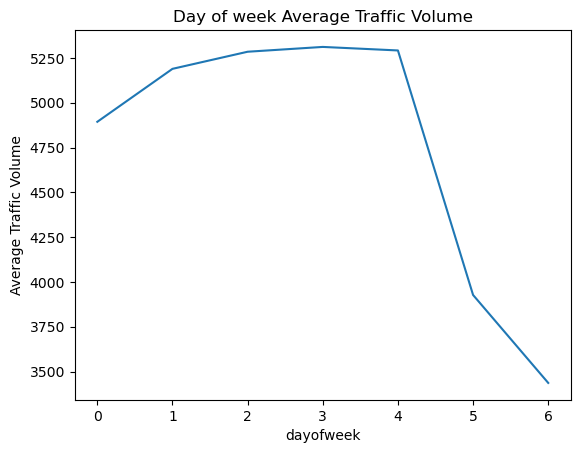

In [16]:
#create a new column that extracts data for each day of the week
#dt.dayofweek will return 0 is Monday, 6 is Sunday

day['dayofweek'] = day['date_time'].dt.dayofweek

#group average data by day of week
by_dayofweek = day.groupby('dayofweek').mean()

#plot dayofweek line graph
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.title('Day of week Average Traffic Volume')
plt.show()


Business days from Monday (0) to Friday(4) have a consistent high traffic and significantly dips during the weekend(5 & 6).
____

## By time of day

We will now generate the line plot for time of day, however because weekends already have low traffic volume, this will drag down the average values if we include them. As such, we will start by splitting the data based on day type: business day or weekend.

In [17]:
business_days = day.copy()[day.copy()['dayofweek'] <=4]  # 4 refers to Friday
weekend = day.copy()[day.copy()['dayofweek'] >=5]   # 5 refers to Saturday

#create new column for business_days & weekend to extract hour of day
business_days['hour'] = business_days['date_time'].dt.hour
weekend['hour'] = weekend['date_time'].dt.hour

#group business days average data by hour of day
business_byhour = business_days.groupby('hour').mean()

#group weekend average data by hour of day
weekend_byhour = weekend.groupby('hour').mean()

weekend_byhour['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

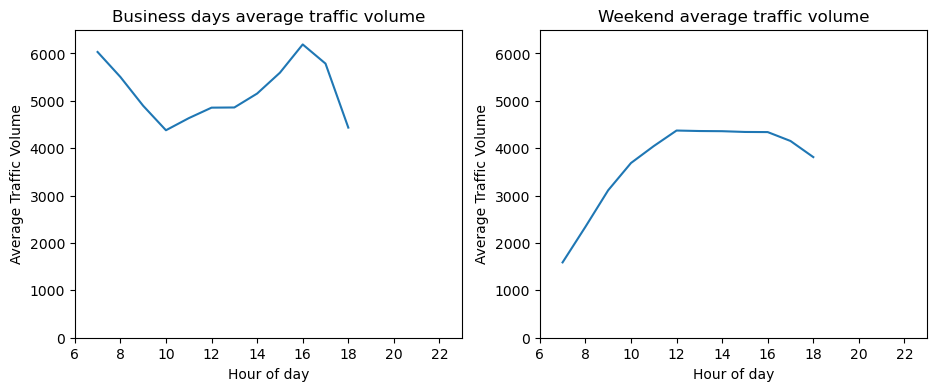

In [18]:
#plot gridchart 

plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
plt.plot(business_byhour['traffic_volume'])
plt.title('Business days average traffic volume')
plt.ylim(0,6500)
plt.xlim(6,23)
plt.ylabel('Average Traffic Volume')
plt.xlabel('Hour of day')

plt.subplot(1,2,2)
plt.plot(weekend_byhour['traffic_volume'])
plt.title('Weekend average traffic volume')
plt.ylim(0,6500)
plt.xlim(6,23)
plt.ylabel('Average Traffic Volume')
plt.xlabel('Hour of day')

plt.show()

On business days, traffic volume are the highest during rush hours - between 6am to 8am in the morning and between 3pm to 5pm in the afernoon. As expected these are timings when people travel to and fro work.

On weekends, traffic volume does not reach as high as on business days, and increases only during 11am to 5pm when people head out for their weekend activities.

We can summarise **our findings for time indicators** for heavy traffic in the following:

* Traffic is heavier on warmer months (March to October).
* Traffic is heavier on business days than weekends
* Traffic is heavier during rush hours 6am to 8am in the morning and between 3pm to 5pm in the afternoon on business days.
___

# Analysing Weather indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about the weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

## Numerical weather correlation
Let's start by looking up numerical weather columns **correlation values with `traffic_volume`**.

In [19]:
day.corr()['traffic_volume'].sort_values()

dayofweek        -0.416453
clouds_all       -0.032932
month            -0.022337
snow_1h           0.001265
rain_1h           0.003697
temp              0.128317
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Temperature appears to have the strongest weather correlation with traffic volume at 0.128. Let's plot a scatter plot to see how this correlationship looks like.

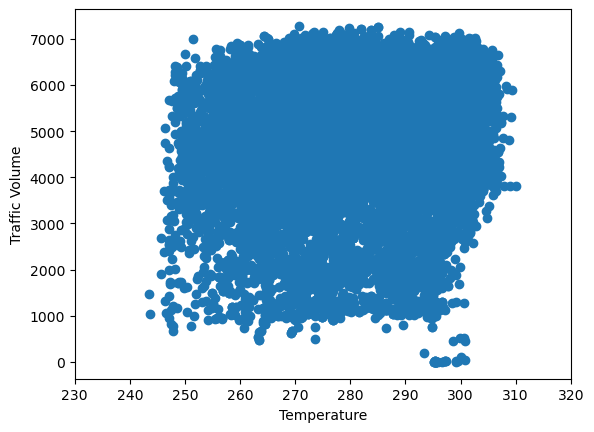

In [20]:
plt.scatter(day['temp'], day['traffic_volume'])
plt.xlim(230, 320)
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

As the scatter plot does not show any specific pattern, we can conclude that `temp` is not a good indicator for heavy traffic.

## Categorical weather correlation

None of the numerical weather columns seem like a reliable indicator for heavy traffic, as such we will move on to check the categorical weather columns: `weather_main` and `weather_description`.

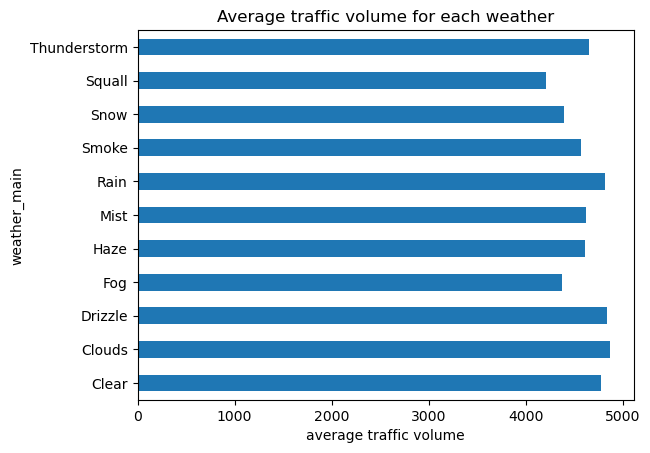

In [21]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.title('Average traffic volume for each weather')
plt.xlabel('average traffic volume')
plt.show()

5000 cars and beyond is our benchmark for heavy traffic as seen in earlier charts.
It appears that there are no weather type in particular causing traffic volume to exceed 5000 cars. 
A clear day has almost the same number cars as a thunderstorm. Let's check the `weather_description` for more granular analysis.

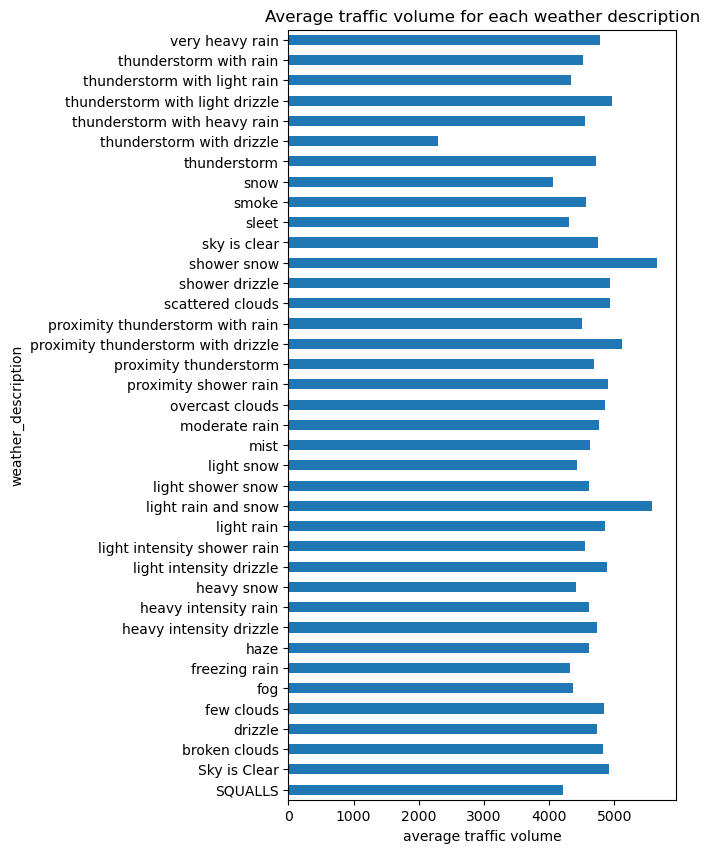

In [22]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.title('Average traffic volume for each weather description')
plt.xlabel('average traffic volume')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking. Wheareas when the weather is really bad, people tend not to go out due to lower visibilty.
____

# Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

**Weather indicators**
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle